# Constants

In [1]:
DEV_SET_PATH = '../data/assignment1_dev_set.csv'
VAL_SET_PATH = '../data/assignment1_val_set.csv'

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Dev Dataset

## Exploration

### Load

In [3]:
df_dev = pd.read_csv(DEV_SET_PATH)
df_dev.shape

(489, 141)

In [4]:
df_dev.head()

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,53.0,19.01,D006262,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,Female,21.0,23.50,D006262,0.001028,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.001406,0.000000,0.000000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,Female,40.0,23.49,D006262,0.000000,0.008825,0.273562,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.359970,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


### Duplicates

In [6]:
df_dev.duplicated().any()

False

### Missing Values

In [7]:
df_dev.isnull().sum().sum()

0

### Info

In [8]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Columns: 141 entries, Unnamed: 0 to Ruminococcus gnavus
dtypes: float64(136), int64(1), object(4)
memory usage: 538.8+ KB


Four columns are categorical: Project ID, Experiment type, Sex, and Disease MESH ID. One column contains integers, which represent the row count. The remaining columns are floats, including BMI and the bacterial data.

### Same Value

In [9]:
df_dev['Experiment type'].nunique()

1

In [10]:
df_dev['Disease MESH ID'].nunique()

1

### Visualize

#### Distributions

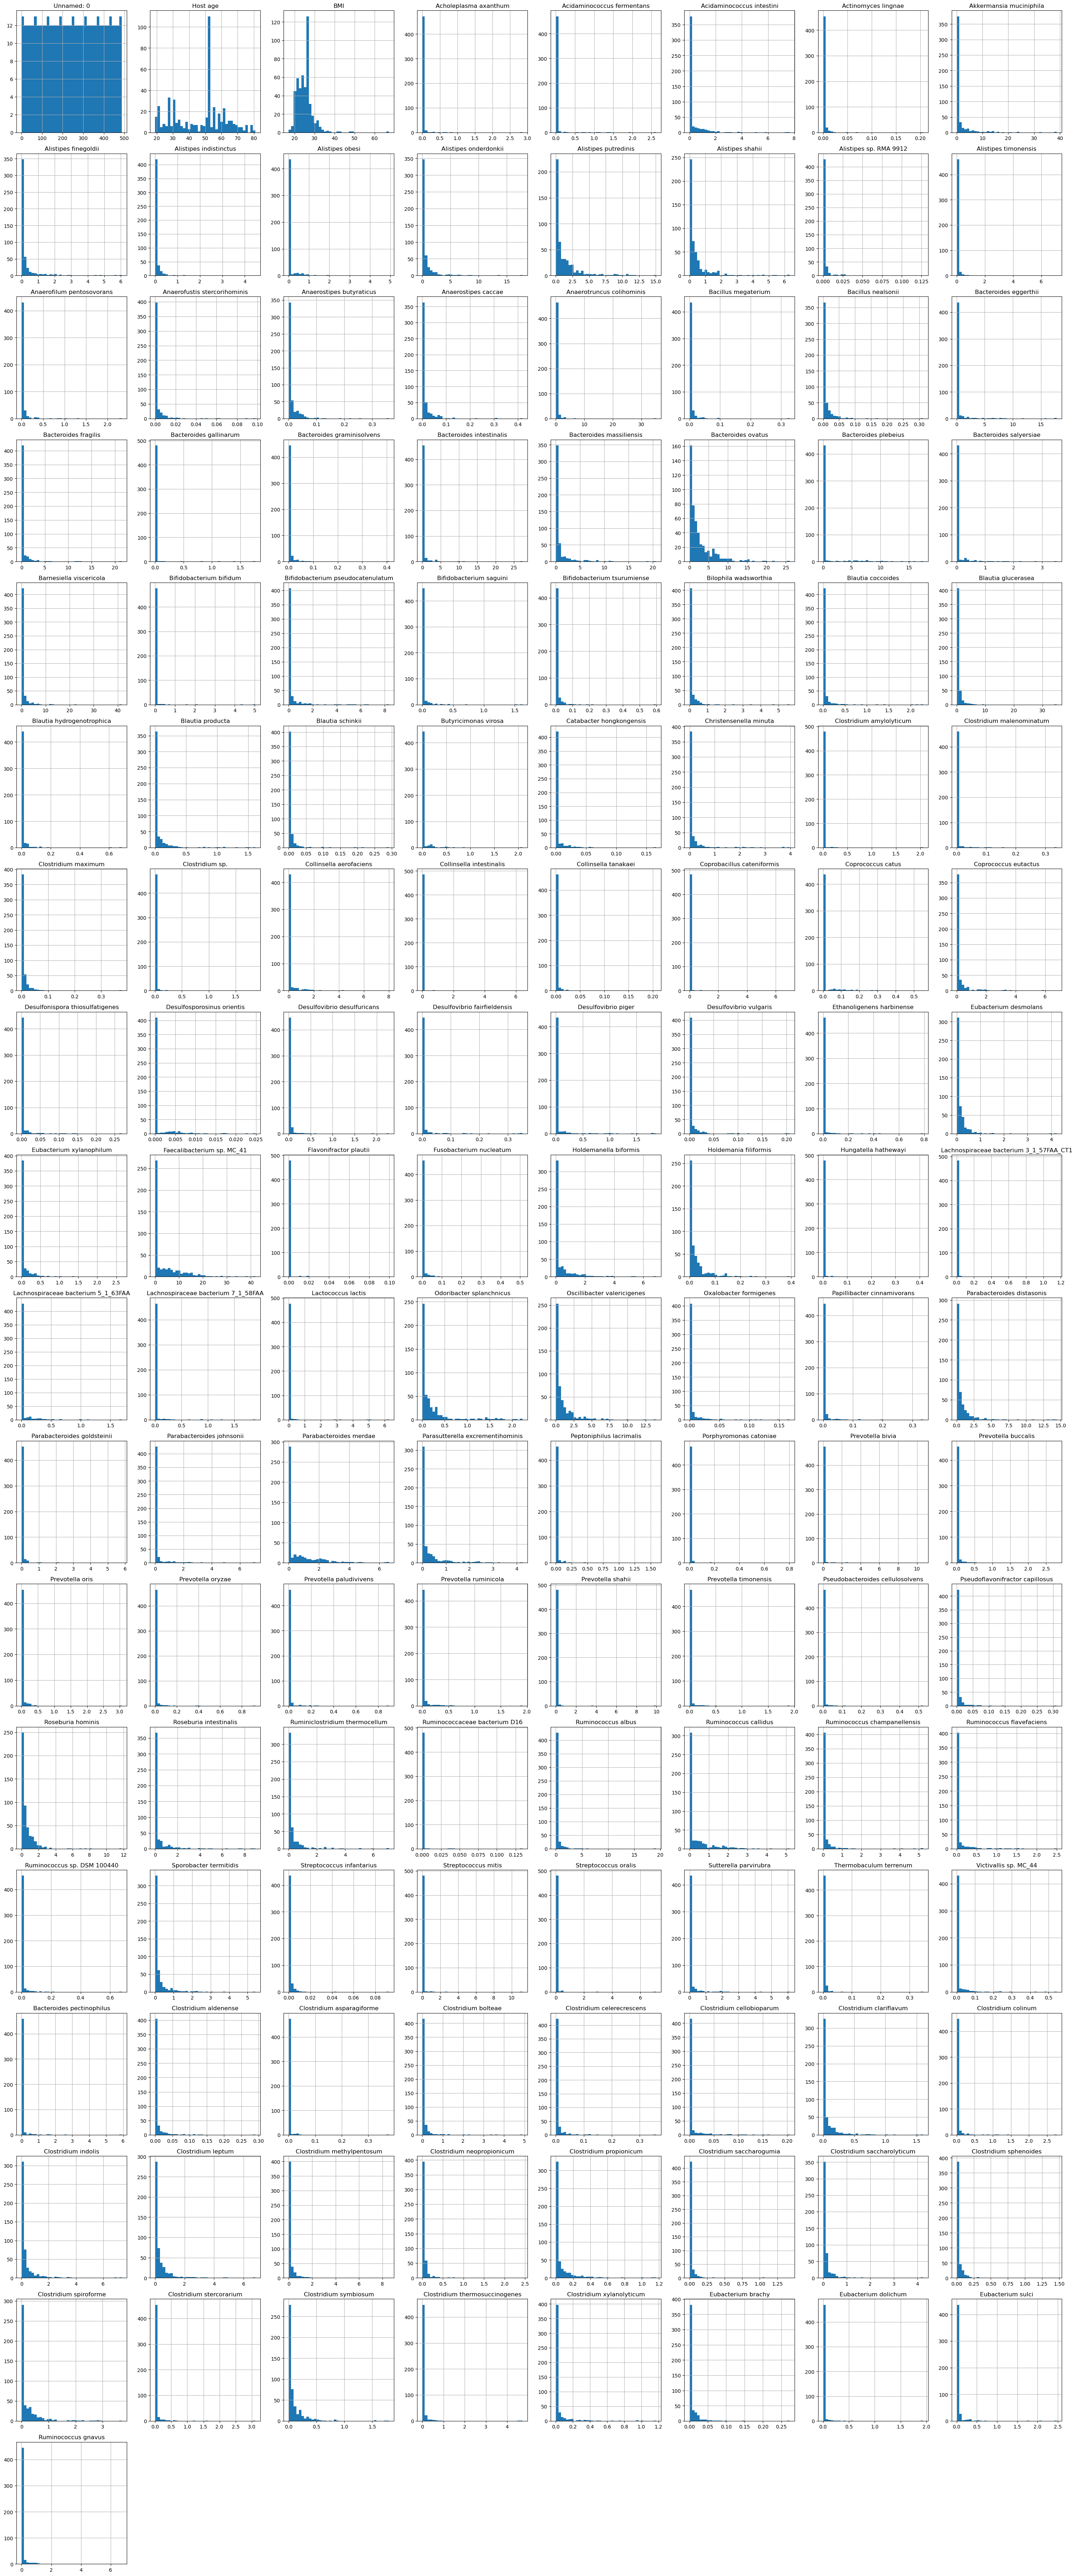

In [11]:
df_dev.hist(bins=40, figsize=(30, 80), layout=(20, 8))

plt.tight_layout()
plt.show()

It is clear from the distributions, that the the range of values for the bacteria are highly varying. So we should preprocess and scale the data before training the model.

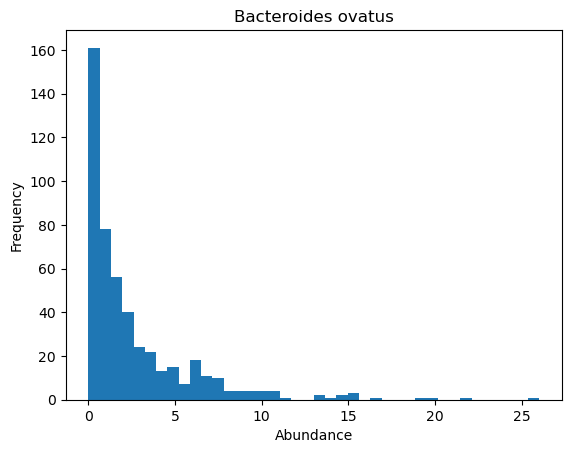

In [13]:
plt.hist(df_dev['Bacteroides ovatus'], bins=40)
plt.title('Bacteroides ovatus')
plt.xlabel('Abundance')
plt.ylabel('Frequency')
plt.show()

In [14]:
df_dev[df_dev['Bacteroides ovatus']>15]

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
4,4,PRJEB11419,Metagenomics,Female,30.0,22.60,D006262,0.002878,0.037419,7.35997,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513
8,8,PRJEB11419,Metagenomics,Male,42.0,24.75,D006262,0.011201,0.000000,0.16241,...,0.000000,0.498432,0.095206,0.095206,0.212814,0.089606,0.000000,0.000000,0.000000,0.000000
142,142,PRJEB11419,Metagenomics,Male,55.0,29.41,D006262,0.000000,0.004309,0.00000,...,0.004309,0.064639,0.000000,0.073257,0.000000,0.008618,0.000000,0.000000,0.000000,0.258554
163,163,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.000000,0.000000,0.00000,...,0.000252,0.097954,0.009065,0.039030,0.000000,0.001511,0.000755,0.000000,0.000755,0.010828
239,239,PRJEB11419,Metagenomics,Male,26.0,26.54,D006262,0.000000,0.000000,0.00000,...,0.000000,0.358056,0.000000,0.017050,0.000000,0.051151,0.000000,0.000000,0.000000,0.017050
431,431,PRJNA388263,Metagenomics,Male,52.0,25.80,D006262,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
454,454,PRJEB11419,Metagenomics,Male,47.0,30.27,D006262,0.000000,0.000000,0.00000,...,0.001212,0.031524,0.000000,0.134583,0.000000,0.000000,0.000000,0.569856,0.002425,0.000000


#### Outliers

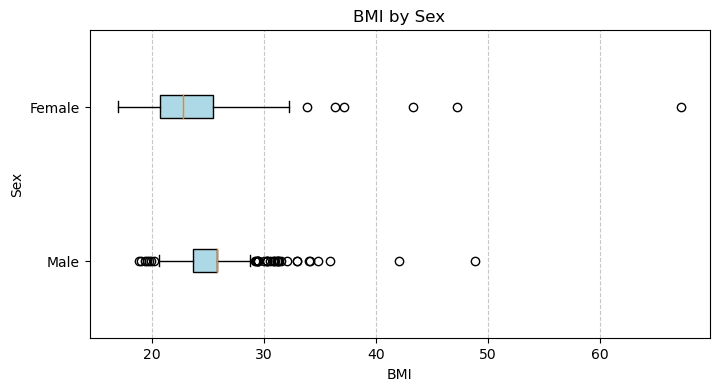

In [15]:
male_bmi = df_dev[df_dev['Sex'] == 'Male']['BMI']
female_bmi = df_dev[df_dev['Sex'] == 'Female']['BMI']

plt.figure(figsize=(8, 4))
plt.boxplot([male_bmi, female_bmi], labels=['Male', 'Female'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('BMI by Sex')
plt.xlabel('BMI')
plt.ylabel('Sex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Correlation of Sex and Age with BMI

In [18]:
df_dev_normal_bmi = df_dev[(df_dev['BMI']>18.5) & (df_dev['BMI']<24.9)]
df_dev_normal_bmi_sorted = df_dev_normal_bmi.sort_values(by='BMI', ascending=False)
df_dev_normal_bmi_sorted.head(10)

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
460,460,PRJEB11419,Metagenomics,Female,29.00,24.80,D006262,0.000000,0.027563,2.269390,...,0.096472,0.284822,0.000000,0.188350,0.000000,0.009188,0.000000,0.045939,0.018376,0.041345
151,151,PRJEB11419,Metagenomics,Female,29.00,24.80,D006262,0.000000,0.017514,1.406970,...,0.099247,0.356121,0.000000,0.070057,0.000000,0.017514,0.017514,0.105085,0.040866,0.087571
148,148,PRJEB11419,Metagenomics,Male,68.00,24.78,D006262,0.000000,0.000000,1.254790,...,0.104752,0.011144,0.000000,0.336543,0.000000,0.013373,0.015601,0.002229,0.093608,0.450209
8,8,PRJEB11419,Metagenomics,Male,42.00,24.75,D006262,0.011201,0.000000,0.162410,...,0.000000,0.498432,0.095206,0.095206,0.212814,0.089606,0.000000,0.000000,0.000000,0.000000
459,459,PRJEB11419,Metagenomics,Female,66.00,24.69,D006262,0.000000,0.000000,1.437990,...,0.081704,0.027235,0.005447,0.000000,0.021788,0.032682,0.005447,0.005447,0.059916,1.574160
407,407,PRJEB11419,Metagenomics,Female,55.00,24.69,D006262,0.001362,0.000000,0.129398,...,0.010897,0.055845,0.021793,0.059932,0.089897,0.010897,0.001362,0.000000,0.027242,0.002724
276,276,PRJEB11419,Metagenomics,Male,50.00,24.57,D006262,0.000000,0.000000,0.024403,...,0.000000,0.053686,0.000000,0.004881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
304,304,PRJNA397219,Metagenomics,Male,59.00,24.46,D006262,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.045910,0.000000,0.000000,0.000000,0.000000,0.000000,0.319240
141,141,PRJNA397219,Metagenomics,Male,59.00,24.46,D006262,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.037680,0.000000,0.000000,0.000000,0.000000,0.000000,0.264240
287,287,PRJNA428202,Metagenomics,Male,23.17,24.45,D006262,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Here, we try explore by eye potential correlations between sex/age and the levels of BMI and bacterial concentration. At this stage, we cannot make any assumptions, as there is no clear evidence to suggest that sex or age significantly influences how bacterial concentration affects BMI levels. This relationship will be further investigated if needed.

The range 18.5–24.9 is considered the normal BMI range, which is why it is used for filtering.

#### Correlation of Bacteria with BMI

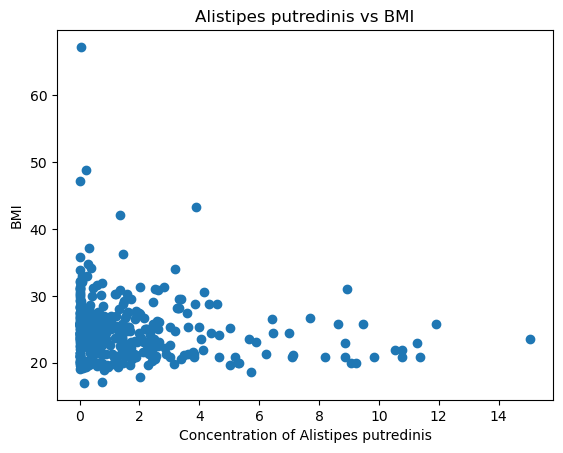

In [16]:
bacteria_column = 'Alistipes putredinis'
plt.scatter(df_dev[bacteria_column], df_dev['BMI'])
plt.xlabel('Concentration of ' + bacteria_column)
plt.ylabel('BMI')
plt.title(bacteria_column + ' vs BMI')
plt.show()

The relationship between BMI and the concentration of Alistipes putredinis appears to be non-linear. The data points are clustered at lower concentrations of Alistipes putredinis (0 to 4) and lower BMI values (20 to 30). There seems to be no uniform trend that can be easily captured by a straight line.

## Cleaning

In [20]:
df_dev_final = df_dev.copy()

### Transform

In [21]:
df_dev_final[df_dev_final['Host age'] % 1 != 0]

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
35,35,PRJNA428202,Metagenomics,Male,27.52,22.99,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,56,PRJNA428202,Metagenomics,Male,27.52,22.99,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,200,PRJNA428202,Metagenomics,Female,21.30,21.95,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,236,PRJNA428202,Metagenomics,Female,32.83,43.29,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,287,PRJNA428202,Metagenomics,Male,23.17,24.45,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,359,PRJNA428202,Metagenomics,Female,21.30,21.95,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,446,PRJNA428202,Metagenomics,Female,26.20,20.98,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,470,PRJNA428202,Metagenomics,Male,23.17,24.45,D006262,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We observed that some age values are not rounded, as some age data in the dataset include decimal points.

In [22]:
df_dev_final['Host age'] = df_dev_final['Host age'].round()
df_dev_final['Host age'].head()

0    53.0
1    21.0
2    52.0
3    40.0
4    30.0
Name: Host age, dtype: float64

In [23]:
df_dev_final['Host age'] = df_dev_final['Host age'].astype('int64')

In [24]:
df_dev_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Columns: 141 entries, Unnamed: 0 to Ruminococcus gnavus
dtypes: float64(135), int64(2), object(4)
memory usage: 538.8+ KB


In [25]:
df_dev_final['BMI'] = df_dev_final['BMI'].round(1)
df_dev_final['BMI'].head()

0    19.0
1    23.5
2    25.8
3    23.5
4    22.6
Name: BMI, dtype: float64

### Encoding

In [26]:
df_dev_final['Sex'] = df_dev_final['Sex'].replace({'Male': 0, 'Female': 1})
df_dev_final.head()

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,0,53,19.0,D006262,0.000000,0.000000,0.000000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,PRJNA388263,Metagenomics,1,21,23.5,D006262,0.001028,0.000000,0.000000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,2,PRJNA388263,Metagenomics,0,52,25.8,D006262,0.001406,0.000000,0.000000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,3,PRJEB11419,Metagenomics,1,40,23.5,D006262,0.000000,0.008825,0.273562,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,4,PRJEB11419,Metagenomics,1,30,22.6,D006262,0.002878,0.037419,7.359970,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


For encoding purposes we assign Male as 0 and Female as 1

We now have sex and age represented as integers, while bmi and bacterial data are stored as floats.

### Remove

In [27]:
df_dev_final = df_dev_final.drop(columns=[df_dev_final.columns[0], 'Project ID', 'Experiment type', 'Sex', 'Host age', 'Disease MESH ID'])
df_dev_final.shape

(489, 135)

Project ID does not influence BMI. Similarly, Experiment type and Disease MESH ID have the same values across all entries in the dataset, with values "Metagenomics" and "D006262," respectively, and thus do not contribute to variations in BMI.

We are also removing the sex and age columns, as they are not required for the current analysis.

### Scaling

In [28]:
scaler = StandardScaler()

cols_to_scale = df_dev_final.columns[1:]  # Exclude ΒΜΙ

scaler = StandardScaler()
df_dev_final[cols_to_scale] = scaler.fit_transform(df_dev_final[cols_to_scale])

df_dev_final.head()

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,19.0,-0.116074,-0.151651,-0.366867,-0.154353,-0.357553,-0.396184,-0.258769,-0.239862,-0.330029,...,-0.264395,-0.445361,-0.178185,-0.497202,-0.161263,-0.315570,-0.357998,-0.129594,-0.214033,0.019673
1,23.5,-0.108980,-0.151651,-0.366867,-0.154353,2.663768,-0.393737,-0.258769,-0.239862,-0.360113,...,-0.329484,-0.500254,2.108974,-0.481538,-0.170765,-0.315570,0.118380,0.024110,0.196608,-0.210150
2,25.8,-0.106369,-0.151651,-0.366867,-0.019414,-0.361007,-0.077031,-0.258769,-0.239862,-0.380398,...,-0.329484,-0.494017,-0.162598,-0.461486,-0.170765,-0.315570,-0.357998,-0.129594,-0.199298,-0.180683
3,23.5,-0.116074,-0.106995,-0.026565,-0.154353,-0.351405,-0.389180,1.200847,-0.239862,-0.392011,...,-0.134492,-0.100140,-0.178185,0.309746,-0.071131,0.515577,-0.357998,-0.129594,-0.230236,-0.221277
4,22.6,-0.096208,0.037702,8.788685,-0.154353,-0.158938,-0.396184,-0.258769,-0.239862,0.765691,...,3.041408,-0.229310,-0.178185,-0.233995,0.005653,0.368071,0.740698,-0.129594,0.070595,-0.193578


## Save

In [29]:
df_dev_final.to_csv('../data/development_final_data.csv', index=False)  

# Val Dataset

Based on the exploration of the dev set, we perform similar basic checks on the val set and clean it using the same approach. However, we skip the cleaning process for the sex and age columns, as they have been excluded from the analysis.

In [30]:
df_val = pd.read_csv(VAL_SET_PATH)
df_val.shape

(211, 141)

In [31]:
df_val.head()

,Unnamed: 0,Project ID,Experiment type,Sex,Host age,BMI,Disease MESH ID,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,PRJEB11419,Metagenomics,Male,60.0,25.71,D006262,0.0,0.000000,1.621960,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,1,PRJNA379979,Metagenomics,Male,57.0,27.20,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,PRJEB11419,Metagenomics,Male,65.0,22.35,D006262,0.0,0.002095,0.000000,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,3,PRJEB11419,Metagenomics,Male,55.0,25.52,D006262,0.0,0.000000,0.044998,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,4,PRJNA379979,Metagenomics,Female,54.0,21.60,D006262,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Duplicates

In [32]:
df_val.duplicated().any()

False

## Missing Values

In [33]:
df_val.isnull().sum().sum()

0

## Cleaning

In [35]:
df_val_final = df_val.copy()

In [36]:
df_val_final = df_val_final.drop(columns=[df_val_final.columns[0], 'Project ID', 'Experiment type', 'Sex', 'Host age', 'Disease MESH ID'])
df_val_final.shape

(211, 135)

In [37]:
df_val_final['BMI'] = df_val_final['BMI'].round(1)
df_val_final['BMI'].head()

0    25.7
1    27.2
2    22.4
3    25.5
4    21.6
Name: BMI, dtype: float64

In [38]:
df_val_final[cols_to_scale] = scaler.fit_transform(df_val_final[cols_to_scale])

df_val_final.head()

,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,Alistipes obesi,Alistipes onderdonkii,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,25.7,-0.137066,-0.151394,1.507344,-0.123487,-0.340352,-0.235384,-0.150081,-0.204181,-0.486055,...,-0.379542,4.900793,-0.180919,-0.163163,0.634181,-0.161203,0.313723,-0.104544,-0.170046,0.635386
1,27.2,-0.137066,-0.151394,-0.389535,-0.123487,-0.340352,-0.320879,-0.237927,-0.204181,-0.524096,...,-0.379542,-0.429761,-0.180919,-0.488701,-0.233484,-0.236104,-0.465205,-0.104544,-0.434144,-0.199604
2,22.4,-0.137066,-0.109337,-0.389535,-0.123487,-0.339793,-0.268389,-0.237927,-0.204181,-0.354578,...,-0.379542,-0.309204,-0.180919,-0.408756,-0.233484,-0.036834,0.311906,-0.051068,-0.065268,-0.199604
3,25.5,-0.137066,-0.151394,-0.336909,-0.123487,-0.336658,-0.307868,-0.237927,-0.204181,-0.473925,...,-0.322818,-0.262680,-0.180919,-0.472188,-0.181469,-0.236104,-0.465205,0.072187,0.436634,-0.178628
4,21.6,-0.137066,-0.151394,-0.389535,-0.123487,-0.340352,-0.320879,-0.237927,-0.204181,-0.524096,...,-0.379542,-0.429761,-0.180919,-0.488701,-0.233484,-0.236104,-0.465205,-0.104544,-0.434144,-0.199604


## Save

In [39]:
df_val_final.to_csv('../data/evaluation_final_data.csv', index=False)